<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
data=pd.read_csv('/datasets/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [23]:
data.isna().mean()

Пол                  0.0
Возраст              0.0
Зарплата             0.0
Члены семьи          0.0
Страховые выплаты    0.0
dtype: float64

Пропусков нет.

In [18]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


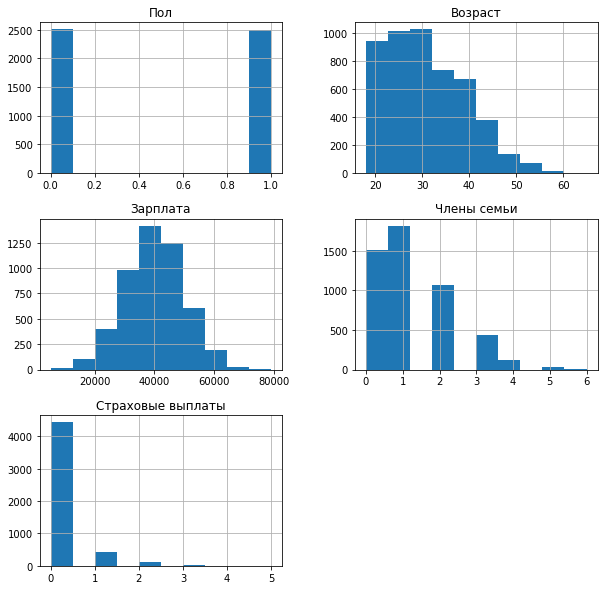

In [21]:
data.hist(figsize=(10,10));

В целом данные без выбросов. Хорошее распределение, можно приступать к работе.

In [28]:
data.duplicated().mean()

0.0306

Выделю целевой фичи и целевой признак

In [4]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [5]:
features.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


Вывод: Данные не нуждаются в предобрабтке. Пропуски и выбросы отсуствуют. Есть 3% дубликатов, но в целом возможно это не дубликаты, а совпадения. Так как в случае данной задачи эти дубликаты никак на результат не скажутся, даже если они настоящие, то и удалять я не вижу смысла.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Создам класс LinReg и напишу 2 метода fit и predict.
Первый находит веса w, второй делает предсказания:

In [6]:
class LinReg:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv((X.T @ X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        print(w)
        
    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Создам модель и обучу. Найду её предсказания на обучающей выборке и сохраню их в переменной predictions. Напечатаем на экране веса и значение метрики R2. Она вычисляется по MSE.

In [7]:
model = LinReg()
model.fit(features, target)
predictions = model.predict(features)
r2_score(target, predictions)

[-9.38235504e-01  7.92580543e-03  3.57083050e-02 -1.70080492e-07
 -1.35676623e-02]


0.42494550286668

Создадим случайную квадратную матрицу, размером по количеству столбцов features

In [8]:
random_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
random_matrix

array([[-0.39600963, -1.18333334, -0.87910373, -0.69455622],
       [ 1.23314733, -0.51552164, -0.01915819, -2.2709233 ],
       [-0.96905721, -0.20723418,  0.67823996, -0.92832885],
       [-0.76368037,  0.18925172,  0.19161151,  0.82716712]])

In [9]:
np.linalg.inv(random_matrix)

array([[ 6.48403109e-03,  5.88222453e+00, -3.33266566e+00,
         1.24143893e+01],
       [-9.96054306e-01, -1.44450331e+01,  7.39602142e+00,
        -3.21935404e+01],
       [ 1.90120476e-02,  1.21084632e+01, -5.73622024e+00,
         2.68210583e+01],
       [ 2.29474540e-01,  5.93080372e+00, -3.44026645e+00,
         1.38231858e+01]])

Матрица обратима

И перемножу исходную на обратную матрицы, должна получиться единичная матрица:

In [10]:
random_matrix @ np.linalg.inv(random_matrix)

array([[ 1.00000000e+00,  1.90443991e-15, -1.84988292e-16,
        -8.70746705e-16],
       [ 9.17065418e-18,  1.00000000e+00, -1.99233786e-16,
        -6.26262591e-16],
       [ 1.36064082e-17,  1.76749125e-15,  1.00000000e+00,
         4.02625127e-15],
       [-3.26295119e-17, -1.15165930e-15, -5.25671401e-16,
         1.00000000e+00]])

In [11]:
encoded_features = features.dot(random_matrix)
encoded_features

,0,1,2,3
0,-48015.838162,-10300.945985,33639.229140,-46138.086003
1,-36768.212804,-7898.423728,25772.428893,-35380.131450
2,-20314.440094,-4366.867987,14242.483616,-19560.762540
3,-40385.316837,-8652.112915,28282.587319,-38757.347931
4,-25258.261011,-5424.430136,17700.647477,-24293.663288
...,...,...,...,...
4995,-34562.341558,-7412.316464,24213.013439,-33203.271318
4996,-50737.434366,-10876.409715,35539.314245,-48720.815752
4997,-32827.903763,-7035.170760,22992.334773,-31514.112009
4998,-31663.728508,-6788.514864,22177.721010,-30404.526630


Обучу модель на новых признаках, найду предсказания, веса и посчитаю R2:

In [12]:
model = LinReg()
model.fit(encoded_features, target)
predictions = model.predict(encoded_features)
r2_score(target, predictions)

[-0.93821757  0.04165228 -0.08688716  0.06860434  0.02603918]


0.4249455023598889

Вывод:

**Ответ:** Умножив признаки на обратимую матрицу, качество линейной регрессии не меняется.

**Обоснование:** Веса изменились под новые значения, т.е. признаки исходной матрицы и преобразованной выражаются через коэффициенты(веса w), поэтому качество линейной регресии не изменилось

## Алгоритм преобразования

Напишу алгоритм - функцию преобразования исходных данных в зашифрованный вид, закодировав исходную матрицу:

**Алгоритм**


In [13]:
def encode(features):
    random_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
    encoded_features = features.dot(random_matrix)
    return encoded_features

In [14]:
encode(features)

,0,1,2,3
0,52017.490307,-71655.288248,-135281.882689,26925.930901
1,39859.990928,-54907.126554,-103633.801954,20622.743485
2,22030.141161,-30345.454957,-57270.118675,11395.655948
3,43723.157468,-60231.825301,-113741.980174,22640.145539
4,27376.617232,-37710.960383,-71183.185138,14167.463803
...,...,...,...,...
4995,37438.054911,-51573.456933,-97369.018596,19379.352011
4996,54947.133412,-75690.904005,-142925.747406,28447.111825
4997,35546.429745,-48968.174960,-92463.784201,18404.346217
4998,34290.757058,-47240.332899,-89185.998868,17753.673154


Для расшифровки данных напишу алгоритм - функцию дешифрования, принимающая на вход зашифрованную матрицу encoded_features и возвращающая исходную features:

In [15]:
def decode(encoded_features):
    decoded_features = round(abs(encoded_features.dot(np.linalg.inv(random_matrix))))
    for i in decoded_features.iloc[:, [0, 3]]:
        decoded_features[i] = decoded_features[i].astype(int)
    decoded_features.columns = features.columns
    return decoded_features

decode(encoded_features)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


Полученная матрица полностью соответсвует изначальной

**Обоснование**

Докажем, почему качество линейной регрессии не поменяется. Предсказания высчитываются по формуле:
$$
a = Xw
$$



Т.к. новая матрица признаков получается умножением исходной Х на рандомную(обозначим М), то формула применит вид:

$$
a' = Xmw'
$$
Подставив вычисленное значение весов $w'=M^{-1}w$ получаем:
$$
a' = XmM^{-1}w
$$
$mM^{-1}$ это еденичная матрица E , т.е. можно сократить:
$$
a' = Xw=a
$$
Предсказания по исходной и преобразованной матрицам равны.



Вывод:

Предложенный алгоритм преобразования данных справляется для решения задачи.

Качество линейной регрессии не меняется, т.к. новые признаки равны $XМ$, а новые веса $w'=M^{-1}w$, поэтому a' = Xw=a. Новые признаки выражаются через исходную, умножив на случайную матрицу, соответственно и новые коэффициенты весов. Но так как оба множителя в произведении выражают исходные через определенные коэффициенты, то качество линейной регресии не измениться.

## Проверка алгоритма

Проверю, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применю метрику R2.

Создам модель sklearn_model и обучу на 2 обучающих матрицах:

исходной features
кодированной encoded_features

In [16]:
sklearn_model = LinearRegression().fit(features, target)
pred = sklearn_model.predict(features)
r2_score(target, pred)

0.4249455028666801

In [17]:

sklearn_model.fit(encoded_features, target)
pred = sklearn_model.predict(encoded_features)
r2_score(target, pred)

0.4249455028666782

Качество модели по двум наборам признаков совпадает.

Вывод:

Качество метрики R2 для 2 матриц признаков: до преобразования и после равны, а также равны R2 по написанному класс линейной регресии LinReg, что говорит о ее правильном написании в сравнении с моделью из sklearn.

## Общий вывод

В ходе выполнения проекта можно сделать следующий вывод:

- Умножая признаки на обратимую матрицу, качество линейной регрессии не меняется. Это обусловленно тем, что Веса изменились под новые значения, т.е. признаки исходной матрицы и преобразованной выражаются через коэффициенты(веса w), поэтому качество линейной регресии не изменилось

- Предложенный алгоритм преобразования данных справляется для решения задачи шифрования признаков.

- Зашифрованные данные так же пригодны для предсказаний с помощью линейной регресии

- Алгоритм позволяет дешифровать данные в любой момент

- Случайность реализованная в алгоритме каждый раз меняется при запуске, что делает зашифрованные данные каждый раз новыми. Такой вид исходных данных становиться очень сложно восстановить без кода программы.

- Реализованный алгоритм полностью удовлетворяет поставленной задаче Защиты персональных данных клиентов страховой компании